In [127]:
%matplotlib inline
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [34]:
img=fits.open('PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits')


TypeError: 'Ellipse' object does not support indexing

In [168]:
a=(2,4)
a/2

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

 x,y,a,b,theta=  344.188027758 64.4298485089 7.15905 5.3293 58.1247
x,y,a,b,theta=  1654.27595481 36.11065737 0.819824 0.803075 60.0027
x,y,a,b,theta=  243.494947516 20.2888180661 1.36051 1.1425 -89.121
x,y,a,b,theta=  570.497561814 24.7168936403 0.830906 0.821743 55.6669
x,y,a,b,theta=  1321.32870041 19.8280674451 0.794885 0.786354 -28.1439
x,y,a,b,theta=  938.210815308 18.1331187414 0.826994 0.811763 -76.2985
x,y,a,b,theta=  1196.72111983 15.45103187 1.48329 1.13319 -25.2154
x,y,a,b,theta=  1354.14698859 13.6311537669 1.0102 0.848858 88.6795
x,y,a,b,theta=  1756.6496636 12.1815218775 0.86271 0.743905 -17.8768
x,y,a,b,theta=  519.693679046 6.79971139285 0.815433 0.80935 -84.7978
cx,cy=  2048.0 1024.0 wh=  200


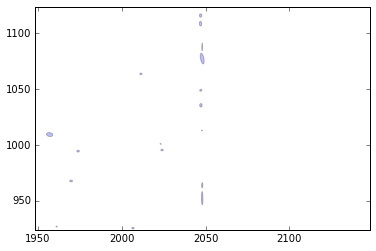

In [173]:
# def plot_image(ax,imgfn):
#     a=fits.open(imgfn)
#     img=a[0].data.shape
#     for i in len(ax): plt.imshow(img,cmap=plt.get_cmap('gray'))

def plot_se(imgfn,se_cat_fn,wh=200):
    #image
    a=fits.open(imgfn)
    img=a[0].data
    cx,cy= img.shape[0]/2.,img.shape[1]/2.
    #se catalogue
    a=fits.open(se_cat_fn)
    a2=a[2].data
    cols= a[2].columns
    ells=[]
    cnt=0
    for x,y,a,b,theta in zip(a2['XWIN_IMAGE'],a2['YWIN_IMAGE'],\
                a2['AWIN_IMAGE'],a2['BWIN_IMAGE'],a2['THETAWIN_IMAGE']):
        cnt+=1
        if cnt <= 10: print "x,y,a,b,theta= ",x,y,a,b,theta
        ells.append(Ellipse(xy=[x,y], width=2*a, height=2*b, angle=theta))
#     ells = [Ellipse(xy=[x,y], width=2*a, height=2*b, angle=theta)
#         for x,y,a,b,theta in zip(a2['XWIN_IMAGE'],a2['YWIN_IMAGE'],\
#                 a2['AWIN_IMAGE'],a2['BWIN_IMAGE'],a2['THETAWIN_IMAGE'])]
    fig,ax = plt.subplots()
    for e in ells:
        ax.add_artist(e)
#         e.set_clip_box(ax.bbox)
        e.set_alpha(0.25)
        e.set_facecolor('b')
    print 'cx,cy= ',cx,cy,'wh= ',wh
    ax.set_xlim(cx-wh/2.,cx+wh/2.)
    ax.set_ylim(cy-wh/2.,cy+wh/2.)
    plt.show()
        
plot_se('PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits','se_cat3.fits')


In [72]:
a=fits.open('psfex_cat.fits')
a.info()
dat=a[1].data
hd=a[1].header


Filename: psfex_cat.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1    PSF_DATA    BinTableHDU     32   1R x 1C      [1350E]   


In [95]:
a[1].header
pf = fits.open('psfex_cat.fits', memmap=True)
data = pf[1].data
hdr = pf[1].header
# data['psf_mask'
hdr

IndexError: index 1 is out of bounds for axis 0 with size 1

In [107]:
data['PSF_MASK'][0]
hdr['POLDEG1'] #.strip() #== 'X_IMAGE'

2

In [94]:
print dat.columns
ims=dat['PSF_MASK']
print hdr.get('POLZERO1'),hdr.get('POLZERO2')

ColDefs(
    name = 'PSF_MASK'; format = '1350E'; dim = '(15, 15, 6)'
)
1024.89043617 2043.35246277


In [100]:
data[0].shape

AttributeError: 'FITS_record' object has no attribute 'shape'

In [123]:
a=fits.open('psfex_cat.fits', memmap=True)
pf[1].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 5400 / BYTES PER ROW                                  
NAXIS2  =                    1 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                    1 / FIELDS PER ROWS                                
EXTNAME = 'PSF_DATA'           / TABLE NAME                                     
LOADED  =                  715 / Number of loaded sources                       
ACCEPTED=                  681 / Number of accepted sources                     
CHI2    =           1.07953318 / Final Chi2                                     
POLNAXIS=                   

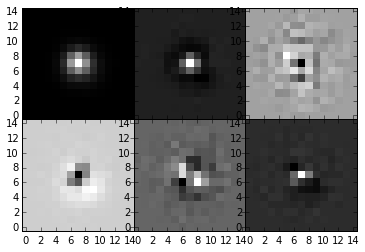

In [125]:
def psf_basis(psfexfn):
    pf = fits.open(psfexfn, memmap=True)
    data = pf[1].data['PSF_MASK']
    data=data[0]
    hdr = pf[1].header
    plt.subplots_adjust(hspace=0, wspace=0)
    rows,cols=2,3
    ima = dict(interpolation='nearest', origin='lower')
    for i in range(data.shape[0]): 
        plt.subplot(rows, cols, i+1)
        plt.imshow(data[i,:,:], cmap=plt.get_cmap('gray'),**ima)
psf_basis('psfex_cat.fits')

In [ ]:
def psf_grid(psfexfn):
    pf = fits.open(psfexfn, memmap=True)
    data = pf[1].data['PSF_MASK']
    data=data[0]
    hdr = pf[1].header
    plt.subplots_adjust(hspace=0, wspace=0)
    rows,cols=2,3
    ima = dict(interpolation='nearest', origin='lower')
    for i in range(data.shape[0]): 
        plt.subplot(rows, cols, i+1)
        plt.imshow(data[i,:,:], cmap=plt.get_cmap('gray'),**ima)
psf_grid('psfex_cat.fits')

def plot_grid(psf, xx, yy, term=None, stampsize=None, **kwargs):

    nil,xpows,ypows = psf.polynomials(0., 0., powers=True)
    plt.clf()
    i = 1
    for y in yy:
        for x in xx:
            psf = None
            for ip,(xp,yp) in enumerate(zip(xpows, ypows)):
                if term is not None and term != ip:
                    continue
                poly = psf.polynomials(x, y)
                thispsf = poly[ip] * psf.psfbases[ip,:,:]
                if psf is None:
                    psf = thispsf
                else:
                    psf += thispsf
            plt.subplot(len(yy), len(xx), i)
            i = i + 1
            if cut > 0:
                psf = psf[cut:-cut, cut:-cut]
            plt.imshow(psf, **ima)
            plt.xticks([]); plt.yticks([])
    if term is not None:
        plt.suptitle('PSF component for x^%i y^%i' % (xpows[term], ypows[term]))

('Got', (6, 15, 15), 'PSF images')
('PsfEx sampling:', 1.0)
('PsfEx degree:', 2)


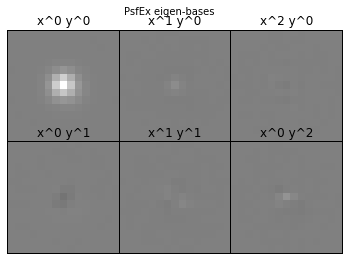

In [131]:
class KaylanPsfex(object):
    '''
    An object representing a PsfEx PSF model.
    '''
    def __init__(self, psfexfn):
        pf = fits.open(psfexfn, memmap=True)
        ims = pf[1].data['PSF_MASK']
        ims=ims[0]
        hdr = pf[1].header
        print('Got', ims.shape, 'PSF images')
        # PSF distortion bases are polynomials of x,y
        assert(hdr['POLNAME1'].strip() == 'X_IMAGE')
        assert(hdr['POLNAME2'].strip() == 'Y_IMAGE')
        assert(hdr['POLGRP1'] == 1)
        assert(hdr['POLGRP2'] == 1)
        assert(hdr['POLNGRP' ] == 1)
        x0     = hdr.get('POLZERO1')
        xscale = hdr.get('POLSCAL1')
        y0     = hdr.get('POLZERO2')
        yscale = hdr.get('POLSCAL2')
        degree = hdr.get('POLDEG1')
        self.sampling = hdr.get('PSF_SAMP')
        print('PsfEx sampling:', self.sampling)
        # number of terms in polynomial
        ne = (degree + 1) * (degree + 2) / 2
        assert(hdr['PSFAXIS3'] == ne)
        assert(len(ims.shape) == 3)
        assert(ims.shape[0] == ne)
        self.psfbases = ims
        self.xscale, self.yscale = xscale, yscale
        self.degree = degree
        print('PsfEx degree:', self.degree)
        bh,bw = self.psfbases[0].shape
        self.radius = (bh+1)/2.
        self.x0,self.y0 = x0,y0

    def polynomials(self, x, y, powers=False):
        dx = (x - self.x0) / self.xscale
        dy = (y - self.y0) / self.yscale
        nb,h,w = self.psfbases.shape
        terms = np.zeros(nb)

        if powers:
            xpows = np.zeros(nb, int)
            ypows = np.zeros(nb, int)

        for d in range(self.degree + 1):
            # x polynomial degree = j
            # y polynomial degree = k
            for j in range(d+1):
                k = d - j
                amp = dx**j * dy**k
                # PSFEx manual pg. 111 ?
                ii = j + (self.degree+1) * k - (k * (k-1))/ 2
                #print('getPolynomialTerms: j=', j, 'k=', k, 'd=', d, 'ii=', ii)
                # It goes: order 0, order 1, order 2, ...
                # and then j=0, j=1, ...
                terms[ii] = amp
                if powers:
                    xpows[ii] = j
                    ypows[ii] = k
        if powers:
            return (terms, xpows, ypows)
        return terms

    def at(self, x, y, nativeScale=True):
        '''
        Returns an image of the PSF at the given pixel coordinates.
        '''
        psf = np.zeros_like(self.psfbases[0])

        #print('Evaluating PsfEx at', x,y)
        for term,base in zip(self.polynomials(x,y), self.psfbases):
            #print('  polynomial', term, 'x base w/ range', base.min(), base.max())
            psf += term * base

        if nativeScale and self.sampling != 1:
            from scipy.ndimage.interpolation import affine_transform
            ny,nx = psf.shape
            spsf = affine_transform(psf, [1./self.sampling]*2,
                                    offset=nx/2 * (self.sampling - 1.))
            return spsf
            
        return psf


    def plot_bases(self, autoscale=True, stampsize=None):
        '''6 panel plot of the 6 psfex basis vectors'''
        N = len(self.psfbases)
        cols = int(np.ceil(np.sqrt(N)))
        rows = int(np.ceil(N / float(cols)))
        plt.clf()
        plt.subplots_adjust(hspace=0, wspace=0)

        cut = 0
        if stampsize is not None:
            H,W = self.shape
            assert(H == W)
            cut = max(0, (H - stampsize) / 2)

        ima = dict(interpolation='nearest', origin='lower',
                  cmap=plt.get_cmap('gray'))
        if autoscale:
            mx = self.psfbases.max()
            ima.update(vmin=-mx, vmax=mx)
        nil, xpows, ypows = self.polynomials(0., 0., powers=True)
        for i,(xp,yp,b) in enumerate(zip(xpows, ypows, self.psfbases)):
            plt.subplot(rows, cols, i+1)

            if cut > 0:
                b = b[cut:-cut, cut:-cut]
            if autoscale:
                plt.imshow(b, **ima)
            else:
                mx = np.abs(b).max()
                plt.imshow(b, vmin=-mx, vmax=mx, **ima)
            plt.xticks([])
            plt.yticks([])
            plt.title('x^%i y^%i' % (xp,yp))
        plt.suptitle('PsfEx eigen-bases')

    def plot_at(self, autoscale=True, stampsize=None):
        ''''''
        N = len(self.psfbases)
        cols = int(np.ceil(np.sqrt(N)))
        rows = int(np.ceil(N / float(cols)))
        plt.clf()
        plt.subplots_adjust(hspace=0, wspace=0)

        cut = 0
        if stampsize is not None:
            H,W = self.shape
            assert(H == W)
            cut = max(0, (H - stampsize) / 2)

        ima = dict(interpolation='nearest', origin='lower',
                  cmap=plt.get_cmap('gray'))
        if autoscale:
            mx = self.psfbases.max()
            ima.update(vmin=-mx, vmax=mx)
        nil, xpows, ypows = self.polynomials(0., 0., powers=True)
        for i,(xp,yp,b) in enumerate(zip(xpows, ypows, self.psfbases)):
            plt.subplot(rows, cols, i+1)

            if cut > 0:
                b = b[cut:-cut, cut:-cut]
            if autoscale:
                plt.imshow(b, **ima)
            else:
                mx = np.abs(b).max()
                plt.imshow(b, vmin=-mx, vmax=mx, **ima)
            plt.xticks([])
            plt.yticks([])
            plt.title('x^%i y^%i' % (xp,yp))
        plt.suptitle('PsfEx eigen-bases')
psf=KaylanPsfex('psfex_cat.fits')
psf.plot_bases()

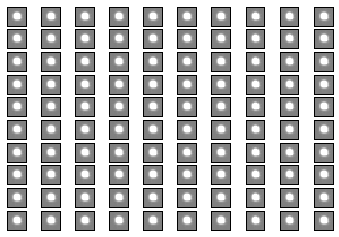

In [132]:
psf.plot_grid(range(10),range(10))

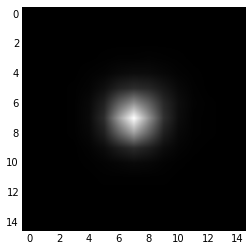

In [143]:
plt.imshow(psf.at(120,1024),cmap=plt.get_cmap('gray'))

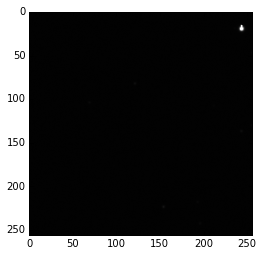

In [145]:
a=fits.open('PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits')
plt.imshow(a[0].data[0:256,0:256],cmap=plt.get_cmap('gray'))